In [1]:
import requests
import json 

# Data displayed in https://datadashboard.health.gov.il/COVID-19


headers = {
    'Accept': 'application/json, text/plain, */*',
    'Content-Type': 'application/json',}

data = {
   "requests":[
      {
         "id":"8",
         "queryName":"testResultsPerDate",
         "single":False,
         "parameters":{

         }
      }
   ]
}

response = requests.post('https://datadashboardapi.health.gov.il/api/queries/_batch', 
                         headers=headers, 
                         data=json.dumps(data))


res = response.json()

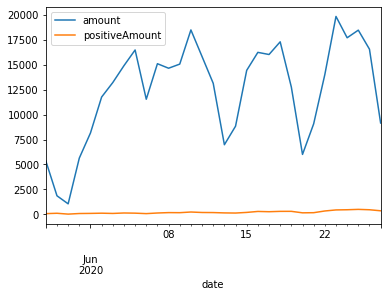

In [5]:
import pandas as pd 
df = pd.DataFrame.from_records(res[0]["data"])
df["date"] = pd.to_datetime(df["date"])

second_wave_start = pd.to_datetime('2020-05-27').date()

df = df.set_index("date")
df = df[df.index.date > second_wave_start]


df.plot()